# Matplotlib: Scatter Plots

* df.plot(kind='scatter')

In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#! pip install adjustText
from adjustText import adjust_text


# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [23]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:
df_exploded = df_DA.explode('job_skills')

skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(20)

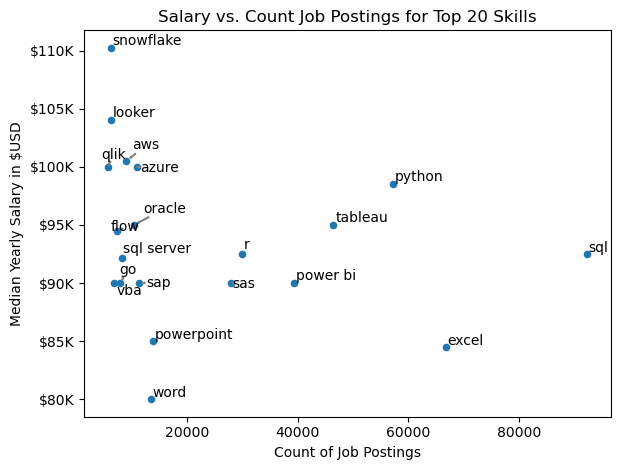

In [33]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary in $USD')
plt.title('Salary vs. Count Job Postings for Top 20 Skills')
plt.tight_layout()

texts =[]

for i, txt in enumerate (skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int (y/1000)}K'))


plt.show()